In [1]:
from sympy import *
from sympy.matrices import *
init_printing(use_latex=True)

## ¿Cómo definir una variable simbólica?

In [10]:
theta = symbols("\\theta")
s = symbols("s")

## ¿Cómo definir una matriz?

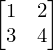

In [15]:
A = Matrix([[1,2],[3,4]])
A

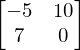

In [17]:
B = Matrix([[-5,10],[7,0]])
B

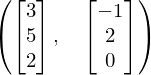

In [27]:
u = Matrix([3,5,2])
v = Matrix([-1,2,0])
u,v

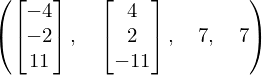

In [31]:
u.cross(v), v.cross(u), u.dot(v), v.dot(u)

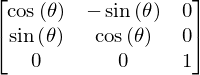

In [35]:
R = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
R

In [38]:
simplify(R.det())

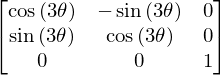

In [41]:
simplify(R*R*R)

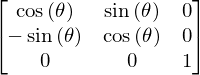

In [43]:
simplify( R.inv() )

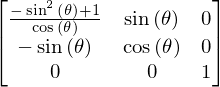

In [44]:
R.inv()

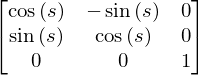

In [46]:
R.subs({theta:s})

In [52]:
def rotz(theta):
    R = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
    return R

def rotx(theta):
    R = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])
    return R

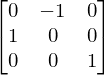

In [53]:
rotz(pi/2)

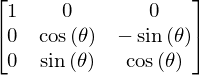

In [55]:
rotx(theta)

In [56]:
phi,psi = symbols("\\phi, \\psi")

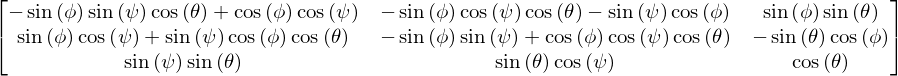

In [61]:
rotz(phi)*rotx(theta)*rotz(psi)

In [76]:
def hrotz(theta):
    R = Matrix([[cos(theta), -sin(theta), 0, 0], [sin(theta), cos(theta), 0, 0], [0, 0, 1, 0], [0,0,0,1]])
    return R

def hrotx(theta):
    R = Matrix([[1, 0, 0, 0], [0, cos(theta), -sin(theta), 0], [0, sin(theta), cos(theta),0], [0,0,0,1]])
    return R

def htra(q):
    D = Matrix([[1,0,0,q[0]], [0,1,0,q[1]], [0,0,1,q[2]], [0,0,0,1]])
    return D

In [77]:
a,b,c = symbols("a,b,c")

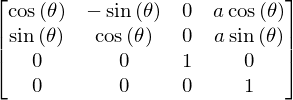

In [78]:
hrotz(theta)*htra([a,0,0])

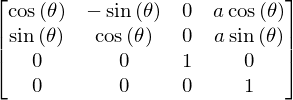

In [106]:
H = htra([a*cos(theta),a*sin(theta),0])*hrotz(theta)
H

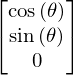

In [108]:
H[:3, 0]

## Gráficas

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

def draw_sys(H):
    O = H[:3,3]
    U = H[:3,0]
    V = H[:3,1]
    plt.quiver(float(O[0]), float(O[1]), float(U[0]), float(U[1]), color="r", scale=5, zorder=999)
    plt.quiver(float(O[0]), float(O[1]), float(V[0]), float(V[1]), color="g", scale=5, zorder=1000)

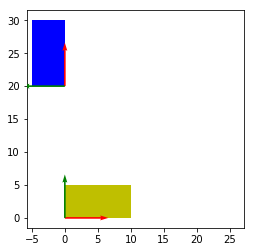

In [112]:
A = Matrix([0,0,0,1])
B = Matrix([10,0,0,1])
C = Matrix([10,5,0,1])
D = Matrix([0,5,0,1])

H = hrotz(pi/2)*htra([20,0,0])

A1 = H*A
B1 = H*B
C1 = H*C
D1 = H*D

plt.fill([A[0], B[0], C[0], D[0]], [A[1], B[1], C[1], D[1]], "y")
plt.fill([A1[0], B1[0], C1[0], D1[0]], [A1[1], B1[1], C1[1], D1[1]], "b")
draw_sys(H)
draw_sys(eye(4))
# plt.xlim([-20,20])
# plt.ylim([-20,20])
plt.axis("square");

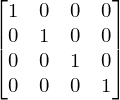

In [114]:
eye(4)

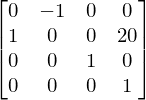

In [115]:
H

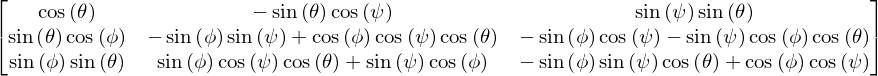

In [116]:
rotx(phi)*rotz(theta)*rotx(psi)